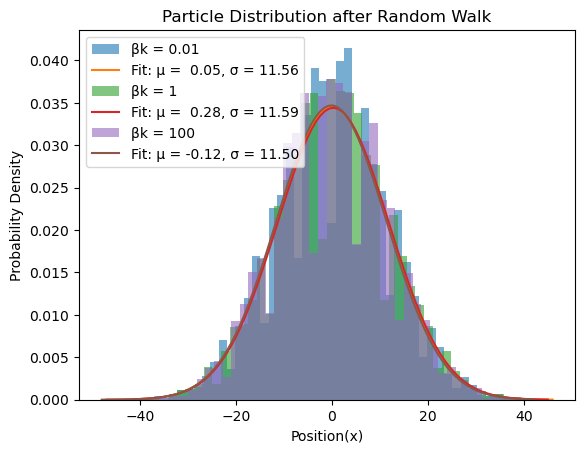

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

particles_num = 10000
steps_num = 200
b_k_values = [0.01, 1, 100]

def V(x):
    return 1

def compute_probabilities(beta, x):
    p_plus = 1/ (1 + np.exp(-beta * (V(x - 1) - V(x + 1))) + np.exp(-beta * (V(x) - V(x + 1))))
    p_zero = 1/ (1 + np.exp(-beta * (V(x - 1) -V(x))) + np.exp(-beta * (V(x+1) - V(x))))
    p_minus = 1/ (1 + np.exp(-beta * (V(x + 1) -V(x - 1))) + np.exp(-beta * (V(x) - V(x - 1))))
    return p_plus, p_zero, p_minus

for b_k in b_k_values:
    p_plus, p_zero, p_minus = compute_probabilities(b_k, 1)

    positions = np.zeros(particles_num, dtype = int)

    for i in range(steps_num):
        rand_vals = np.random.rand(particles_num)
        positions += np.where(rand_vals < p_minus, -1, 0)
        positions += np.where(rand_vals > (1-p_plus), 1, 0)

    mu, sigma = norm.fit(positions)
    plt.hist(positions, bins= 50, density=True, alpha = 0.6, label=f"βk = {b_k}")

    x = np.linspace(min(positions), max(positions), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), label=f"Fit: μ = {mu: .2f}, σ ={sigma: .2f}")

plt.xlabel("Position(x)")
plt.ylabel("Probability Density")
plt.title("Particle Distribution after Random Walk")
plt.legend()
plt.show()


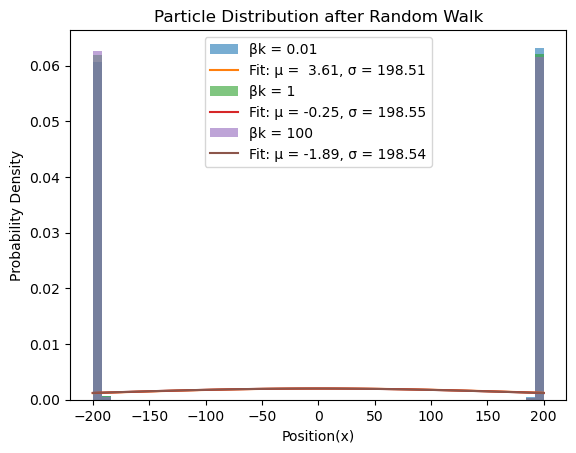

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

particles_num = 10000
steps_num = 200
b_k_values = [0.01, 1, 100]

def V(x):
    return  -x

def compute_probabilities(beta, x,):
    p_plus = 1/ (1 + np.exp(-beta * (V(x - 1) - V(x + 1))) + np.exp(-beta * (V(x) - V(x + 1))))
    p_zero = 1/ (1 + np.exp(-beta * (V(x - 1) -V(x))) + np.exp(-beta * (V(x+1) - V(x))))
    p_minus = 1/ (1 + np.exp(-beta * (V(x + 1) -V(x - 1))) + np.exp(-beta * (V(x) - V(x - 1))))
    return p_plus, p_zero, p_minus

for b_k in b_k_values:
    

    positions = np.zeros(particles_num, dtype = int)

    for i in range(steps_num):
        p_plus, p_zero, p_minus = compute_probabilities(positions, b_k)
        rand_vals = np.random.rand(particles_num)
        positions += np.where(rand_vals < p_minus, -1, 0)
        positions += np.where(rand_vals > (1-p_plus), 1, 0)

    mu, sigma = norm.fit(positions)
    plt.hist(positions, bins= 50, density=True, alpha = 0.6, label=f"βk = {b_k}")

    x = np.linspace(min(positions), max(positions), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), label=f"Fit: μ = {mu: .2f}, σ ={sigma: .2f}")

plt.xlabel("Position(x)")
plt.ylabel("Probability Density")
plt.title("Particle Distribution after Random Walk")
plt.legend()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1988: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


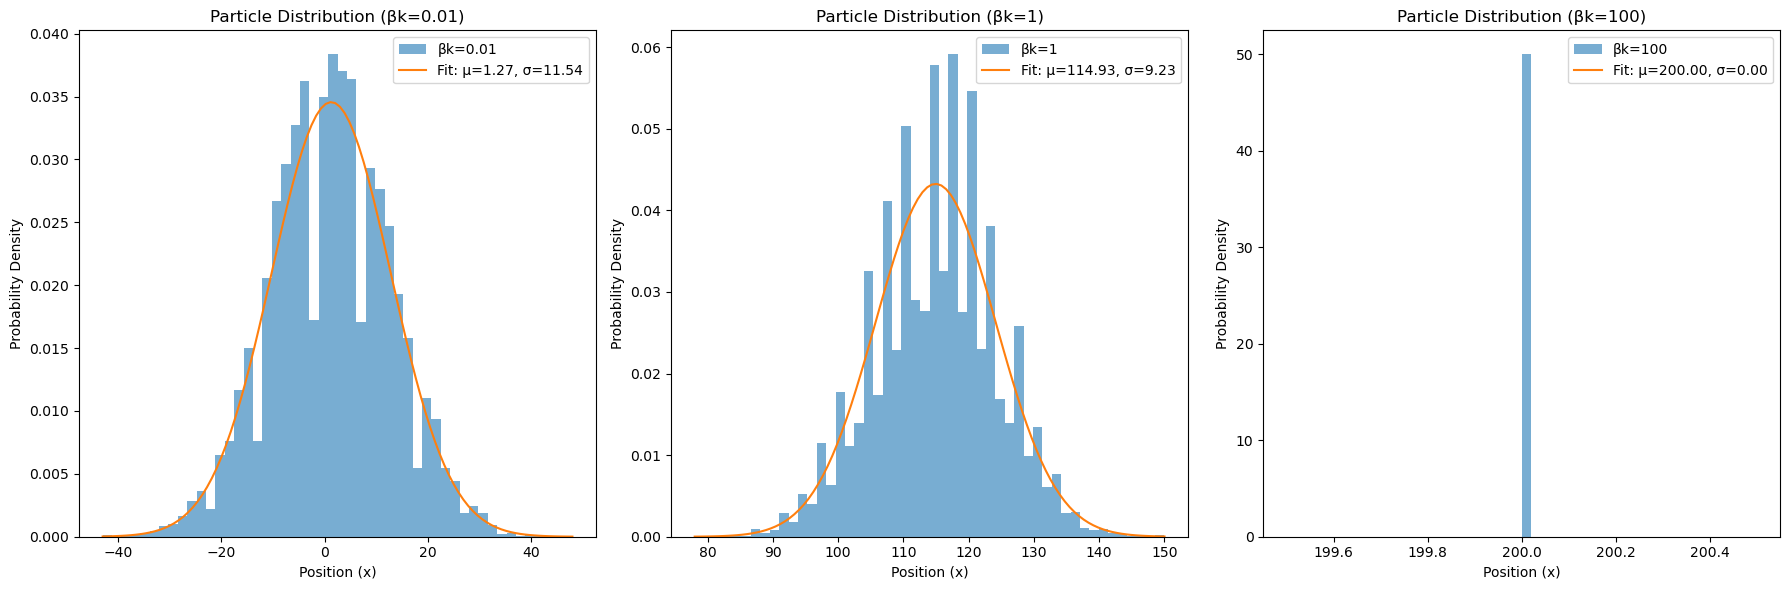

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
num_particles = 10000
num_steps = 200
beta_k_values = [0.01, 1, 100]  # Different values of beta*k
k = 1  # Define k for the potential function

# Potential function (V(x) = -kx)
def V(x):
    return -k * x

# Function to compute transition probabilities vectorized
def compute_probabilities(beta, x):
    V_x = V(x)
    V_x_plus = V(x + 1)
    V_x_minus = V(x - 1)
    
    p_plus = 1 / (1 + np.exp(-beta * (V_x_minus - V_x_plus)) + np.exp(-beta * (V_x - V_x_plus)))
    p_minus = 1 / (1 + np.exp(-beta * (V_x_plus - V_x_minus)) + np.exp(-beta * (V_x - V_x_minus)))
    p_zero = 1 - (p_plus + p_minus)  # Ensure probabilities sum to 1
    
    return p_plus, p_zero, p_minus

# Run simulation for different beta*k values
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, beta_k in enumerate(beta_k_values):
    # Initialize particles at x=0
    positions = np.zeros(num_particles, dtype=int)
    
    # Perform random walk
    for _ in range(num_steps):
        p_plus, p_zero, p_minus = compute_probabilities(beta_k, positions)
        rand_vals = np.random.rand(num_particles)
        positions += np.where(rand_vals < p_minus, -1, 0)
        positions += np.where(rand_vals > (1 - p_plus), 1, 0)
    
    # Fit normal distribution
    mu, sigma = norm.fit(positions)
    
    # Plot histogram
    ax = axes[idx]
    ax.hist(positions, bins=50, density=True, alpha=0.6, label=f"βk={beta_k}")
    
    # Plot fitted normal distribution
    x = np.linspace(min(positions), max(positions), 100)
    ax.plot(x, norm.pdf(x, mu, sigma), label=f"Fit: μ={mu:.2f}, σ={sigma:.2f}")
    
    # Plot settings
    ax.set_xlabel("Position (x)")
    ax.set_ylabel("Probability Density")
    ax.set_title(f"Particle Distribution (βk={beta_k})")
    ax.legend()

plt.tight_layout()
plt.show()